In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('delta.dat', 'r') as f:
     data = f.readlines()

In [3]:
lag = 0
delta = 0
plot_i = []
plot_lag = []
plot_delta = []
for i, line in enumerate(data):
    dvalues = line.split()
    if len(dvalues) > 2 and dvalues[1].strip('-').strip('+').isnumeric() == True:
        #print(dvalues[1])
        lag = dvalues[1].strip('+?').lstrip('?')
        delta = dvalues[2].strip('+').lstrip('?')
        #print(i, lag, delta)
        plot_i.append(i)
        plot_lag.append(lag)
        plot_delta.append(delta)

In [4]:
# Convert lists to numpy arrays
plot_i = np.asarray(plot_i)
plot_i = plot_i.astype(np.int64)
plot_lag = np.asarray(plot_lag)
plot_lag = plot_lag.astype(np.int64)
plot_delta = np.asarray(plot_delta)
plot_delta = plot_delta.astype(np.int64)
plot_zero = np.zeros(len(plot_delta), dtype=np.int64)

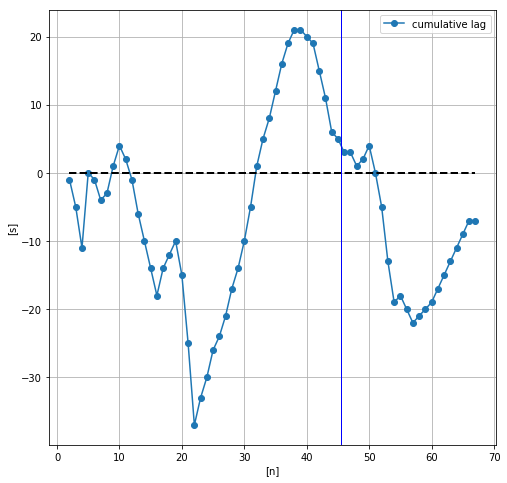

In [5]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.plot(plot_i, plot_lag, label='cumulative lag', marker='o')
plt.plot(plot_i, plot_zero, color='black', linestyle='dashed', linewidth=2)
# Manually added timestamp for reset:
plt.axvline(x=45.5, linewidth=1, color='b')
plt.ylabel('[s]')
plt.xlabel('[n]')
plt.legend()
plt.grid(True)
plt.show()

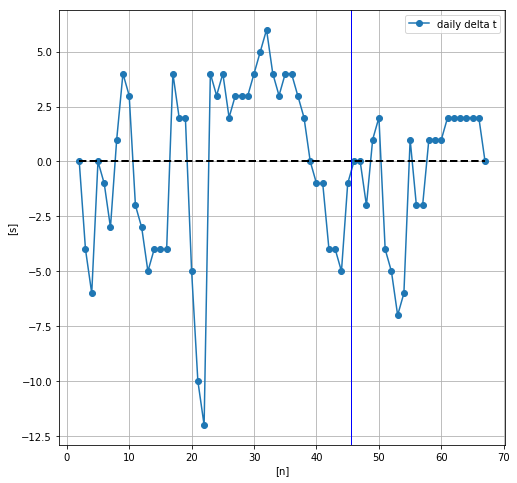

In [6]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.plot(plot_i, plot_delta, label='daily delta t', marker='o')
plt.plot(plot_i, plot_zero, color='black', linestyle='dashed', linewidth=2)
# Manually added timestamp for reset:
plt.axvline(x=45.5, linewidth=1, color='b')
plt.ylabel('[s]')
plt.xlabel('[n]')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
deriv = np.gradient(plot_lag)

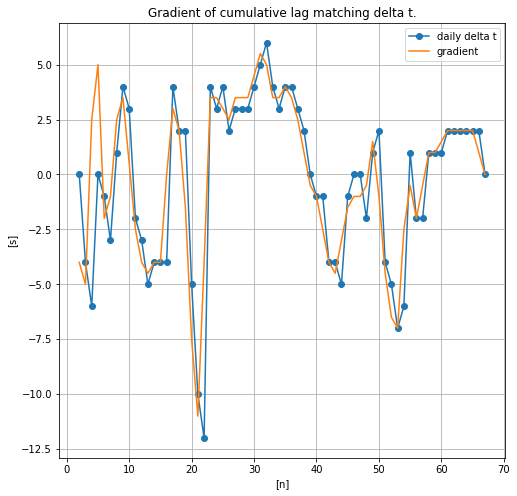

In [8]:
plt.rcParams['figure.figsize'] = [8, 8]
plt.plot(plot_i, plot_delta, label='daily delta t', marker='o')
plt.plot(plot_i, deriv, label='gradient')
plt.ylabel('[s]')
plt.xlabel('[n]')
plt.legend()
plt.title("Gradient of cumulative lag matching delta t.")
plt.grid(True)
plt.show()